###############################################################################################################################################


In [1]:

#----Figure_1-------------------------------------------------------------------
#-------------------------------------------------------------------------------
# This is the code for aPhN clustering analysis, adapted from McKim et al. 2024
#-------------------------------------------------------------------------------

#-load packages-----------------------------------------------------------------
library(tidyverse)
library(coconatfly)

###general variables:-----------------------------------------------------------
set.seed(42)
options(scipen=999)

PATH_input = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/"
PATH_output = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/"
version <- "1.0"  # Specify version manually

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: nat

Loading required package: rgl

Registered S3 method overwritten by 'nat':
  method             from
  as.mesh3d.ashape3d rgl 

Some nat functions depend on a CMTK installation. See ?cmtk and README.md for details.


Attaching package: ‘nat’


The following object is masked from ‘package:rgl’:

    wire3d


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘packag

In [2]:
input_files = list.files(path = PATH_input, full.names = FALSE, recursive = FALSE)

In [3]:
input_files_tmp = list.files(path = paste0(PATH_input,"tmp/"),
full.names = FALSE, recursive = FALSE)
input_files = c(input_files,input_files_tmp)
v = read_delim(paste0(PATH_input,"aPhN_v1.0.csv"),
col_types  =  cols(version  =  col_character()),delim  =  ";")



Warning message:
“The following named parsers don't match the column names: version”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [4]:
v = v$version[1]

# set variables:----------------------------------------------------------------
aPhN = read_delim(paste0(PATH_input,"aPhN_v1.0",v,".csv"),
col_types = cols(root_id = col_character()),delim = ",")

Warning message:
“Unknown or uninitialised column: `version`.”


In [5]:
#-------------------------------------------------------------------------------
#clustering of all endocrine cells
colnames(aPhN)[1] <- 'id'
# paste0(aPhNid, collapse = ",")

#obtain meta data for all apharyngeal cells

In [6]:
#With putataive DCSO
ids_string <- paste(c(
    "720575940628131778", "720575940622199593", "720575940610259406", "720575940617828766",
    "720575940610981362", "720575940624266061", "720575940616308921", "720575940621916952",
    "720575940637130985", "720575940627454569", "720575940629009468", "720575940633165980",
    "720575940637165028", "720575940626014218", "720575940617121819", "720575940624948867",
    "720575940618788944", "720575940621689880", "720575940616616861", "720575940626217226",
    "720575940614830239", "720575940622346180", "720575940625032548", "720575940631069255",
    "720575940633791935", "720575940625163790", "720575940626983952", "720575940658442625",
    "720575940609913042", "720575940623834300", "720575940626015242", "720575940629358807",
    "720575940628891774", "720575940640601563", "720575940619928929", "720575940625031610",
    "720575940620885342", "720575940629972215", "720575940633660314", "720575940609787256",
    "720575940611643033", "720575940635739504", "720575940630734393", "720575940615015976",
    "720575940612420118", "720575940625972261", "720575940622606106", "720575940637019994",
    "720575940626520402", "720575940611168921", "720575940635005303", "720575940617668662",
    "720575940627219272", "720575940632596449", "720575940612642730", "720575940616934289",
    "720575940636943849", "720575940611630194", "720575940620575579", "720575940640611803",
    "720575940622406694", "720575940638054197", "720575940634826135", "720575940611351193",
    "720575940616791067", "720575940612819763", "720575940630597177", "720575940624186602",
    "720575940640554045", "720575940655071905", "720575940621848781", "720575940615879995",
    "720575940623511795", "720575940616196539", "720575940629112887", "720575940623458633",
    "720575940634667234", "720575940625173006", "720575940636542565", "720575940628344074",
    "720575940611056482", "720575940620699162", "720575940618889931", "720575940618156315",
    "720575940610103906"
), collapse = " ")


In [7]:
#Without Putative DCSO
ids_string <- paste(c(
    "720575940628131778", "720575940622199593", "720575940610259406", "720575940617828766",
    "720575940610981362", "720575940624266061", "720575940616308921", "720575940621916952",
    "720575940637130985", "720575940627454569", "720575940629009468", "720575940633165980",
    "720575940637165028", "720575940626014218", "720575940617121819", "720575940624948867",
    "720575940618788944", "720575940621689880", "720575940616616861", "720575940626217226",
    "720575940614830239", "720575940622346180", "720575940625032548", "720575940631069255",
    "720575940633791935", "720575940625163790", "720575940626983952", "720575940658442625",
    "720575940609913042", "720575940623834300", "720575940626015242", "720575940629358807",
    "720575940628891774", "720575940640601563", "720575940619928929", "720575940625031610",
    "720575940620885342", "720575940629972215", "720575940633660314", "720575940609787256",
    "720575940611643033", "720575940635739504", "720575940630734393", "720575940615015976",
    "720575940612420118", "720575940625972261", "720575940622606106", "720575940637019994",
    "720575940626520402", "720575940611168921", "720575940635005303", "720575940617668662",
    "720575940627219272", "720575940632596449", "720575940612642730", "720575940616934289",
    "720575940636943849", "720575940611630194", "720575940620575579", "720575940640611803",
    "720575940622406694", "720575940638054197", "720575940634826135", "720575940611351193",
    "720575940616791067", "720575940612819763", "720575940630597177", "720575940624186602",
    "720575940640554045", "720575940655071905", "720575940621848781", "720575940615879995",
    "720575940623511795", "720575940616196539", "720575940629112887", "720575940623458633",
    "720575940634667234", "720575940625173006", "720575940636542565", "720575940628344074",
    "720575940611056482", "720575940620699162", "720575940618889931", "720575940618156315",
    "720575940610103906"
), collapse = " ")


In [9]:
# Now, retrieve metadata for all root IDs using the concatenated string
apharyngeal <- cf_meta(cf_ids(ids_string, datasets = "flywire"))

Loading required namespace: git2r



In [10]:
apharyngeal = left_join(apharyngeal,aPhN,by = "id")
apharyngeal$side_name_id = paste(
apharyngeal$side,
apharyngeal$name,apharyngeal$id,sep="")

In [11]:
library(bit64)

apharyngeal_partners <- apharyngeal %>%
cf_partners(
threshold = 5,        # Minimum synapse count
partners = "outputs"  # Focus on output synapses
)

# 4. Aggregate synapse counts per neuron
output_counts <- apharyngeal_partners %>%
group_by(pre_id) %>%
summarise(output_count = sum(weight))

# 5. Convert pre_id to character for compatibility
output_counts <- output_counts %>%
mutate(pre_id = as.character(pre_id))

# 6. Join counts back to metadata
apharyngeal <- apharyngeal %>%
left_join(output_counts, by = c("id" = "pre_id")) %>%
filter(output_count >= 5)

Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:dplyr’:

    symdiff


The following object is masked from ‘package:base’:

    xor


Attaching package bit64

package:bit64 (c) 2011-2017 Jens Oehlschlaegel

creators: integer64 runif64 seq :

coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bitstring

logical operator: ! & | xor != == < <= >= >

arithmetic operator: + - * / %/% %% ^

math: sign abs sqrt log log2 log10

math: floor ceiling trunc round

querying: is.integer64 is.vector [is.atomic} [length] format print str

values: is.na is.nan is.finite is.infinite

aggregation: any all min max range sum prod

cumulation: diff cummin cummax cumsum cumprod

access: length<- [ [<- [[ [[<-

combine: c rep cbind rbind as.data.frame

WARNING don't use as subscripts

WARNING semantics differ from integer

for more help type ?bit64


Attaching package: ‘bit64’


The following object is masked from ‘package:u

In [12]:
# after your left_join(aPhN) step you should have a column called `subsubclass`
# create a new label that combines subsubclass and id
apharyngeal <- apharyngeal %>%
  mutate(label_subsub = paste0(subsubclass, ":", id))

# then in your plot call, use that vector as labRow:
pdf(paste0(PATH_output, "Figure_1_WD2o", v, ".pdf"),
    width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)

apharyngeal %>%
  with(cf_cosine_plot(
    key,
    threshold      = 1,
    labRow         = label_subsub,   # ← here!
    interactive    = FALSE,
    partners       = "outputs",
    method         = "ward.D2",
    cexRow         = 0.3,            # might need to shrink further
    cexCol         = 0.3
  ))

dev.off()


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


pdf 
  2

In [13]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/Figure_1_WD2o", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(
key,
threshold = 1,
labRow = id,  # Use raw root IDs for labels
interactive = FALSE,
partners = "outputs",
method = "ward.D2",
cexRow = 0.3,  # Reduce font size for row labels
cexCol = 0.3   # Reduce font size for column labels
))
dev.off()

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


pdf 
  2

Warning message in brewer.pal(length(groups), "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


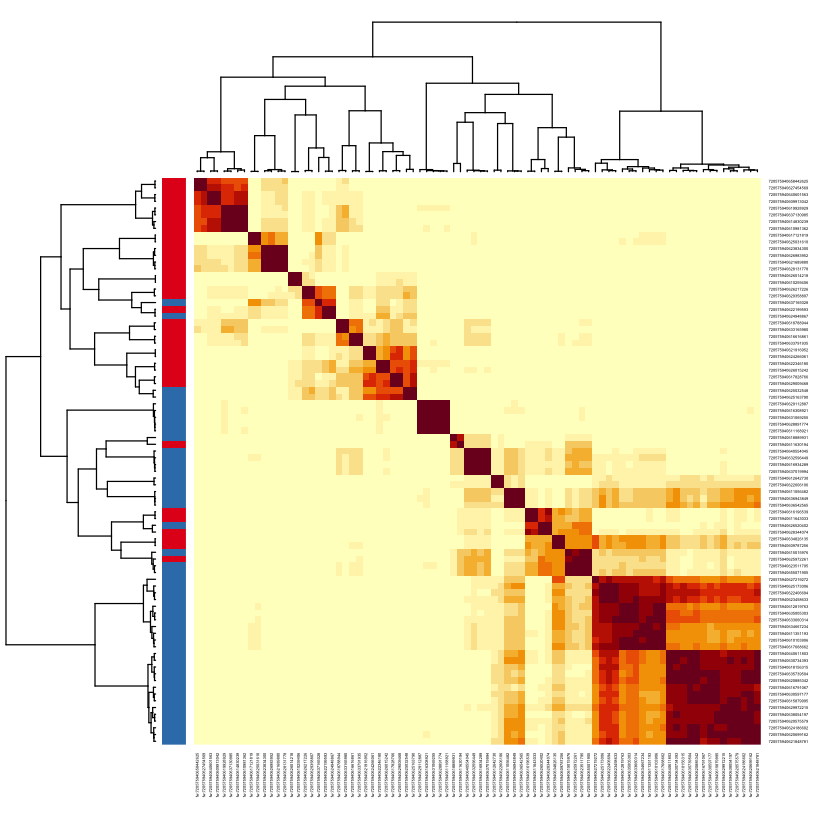

In [14]:
library(RColorBrewer)

# 1) define your palette
groups   <- unique(apharyngeal$sub_class)
pal      <- brewer.pal(length(groups), "Set1")
cols_map <- setNames(pal, groups)

# 2) build a vector of colors in the SAME order as your `key` matrix
row_cols <- cols_map[ apharyngeal$sub_class ]

# 3) plot


apharyngeal %>% with(cf_cosine_plot(
  key,
  threshold      = 1,
  labRow         = id,            # root IDs on the rows
  partners       = "outputs",
  method         = "ward.D2",
  RowSideColors  = row_cols,      # ← here!
  cexRow         = 0.3,
  cexCol         = 0.3,
  interactive    = FALSE
))



Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


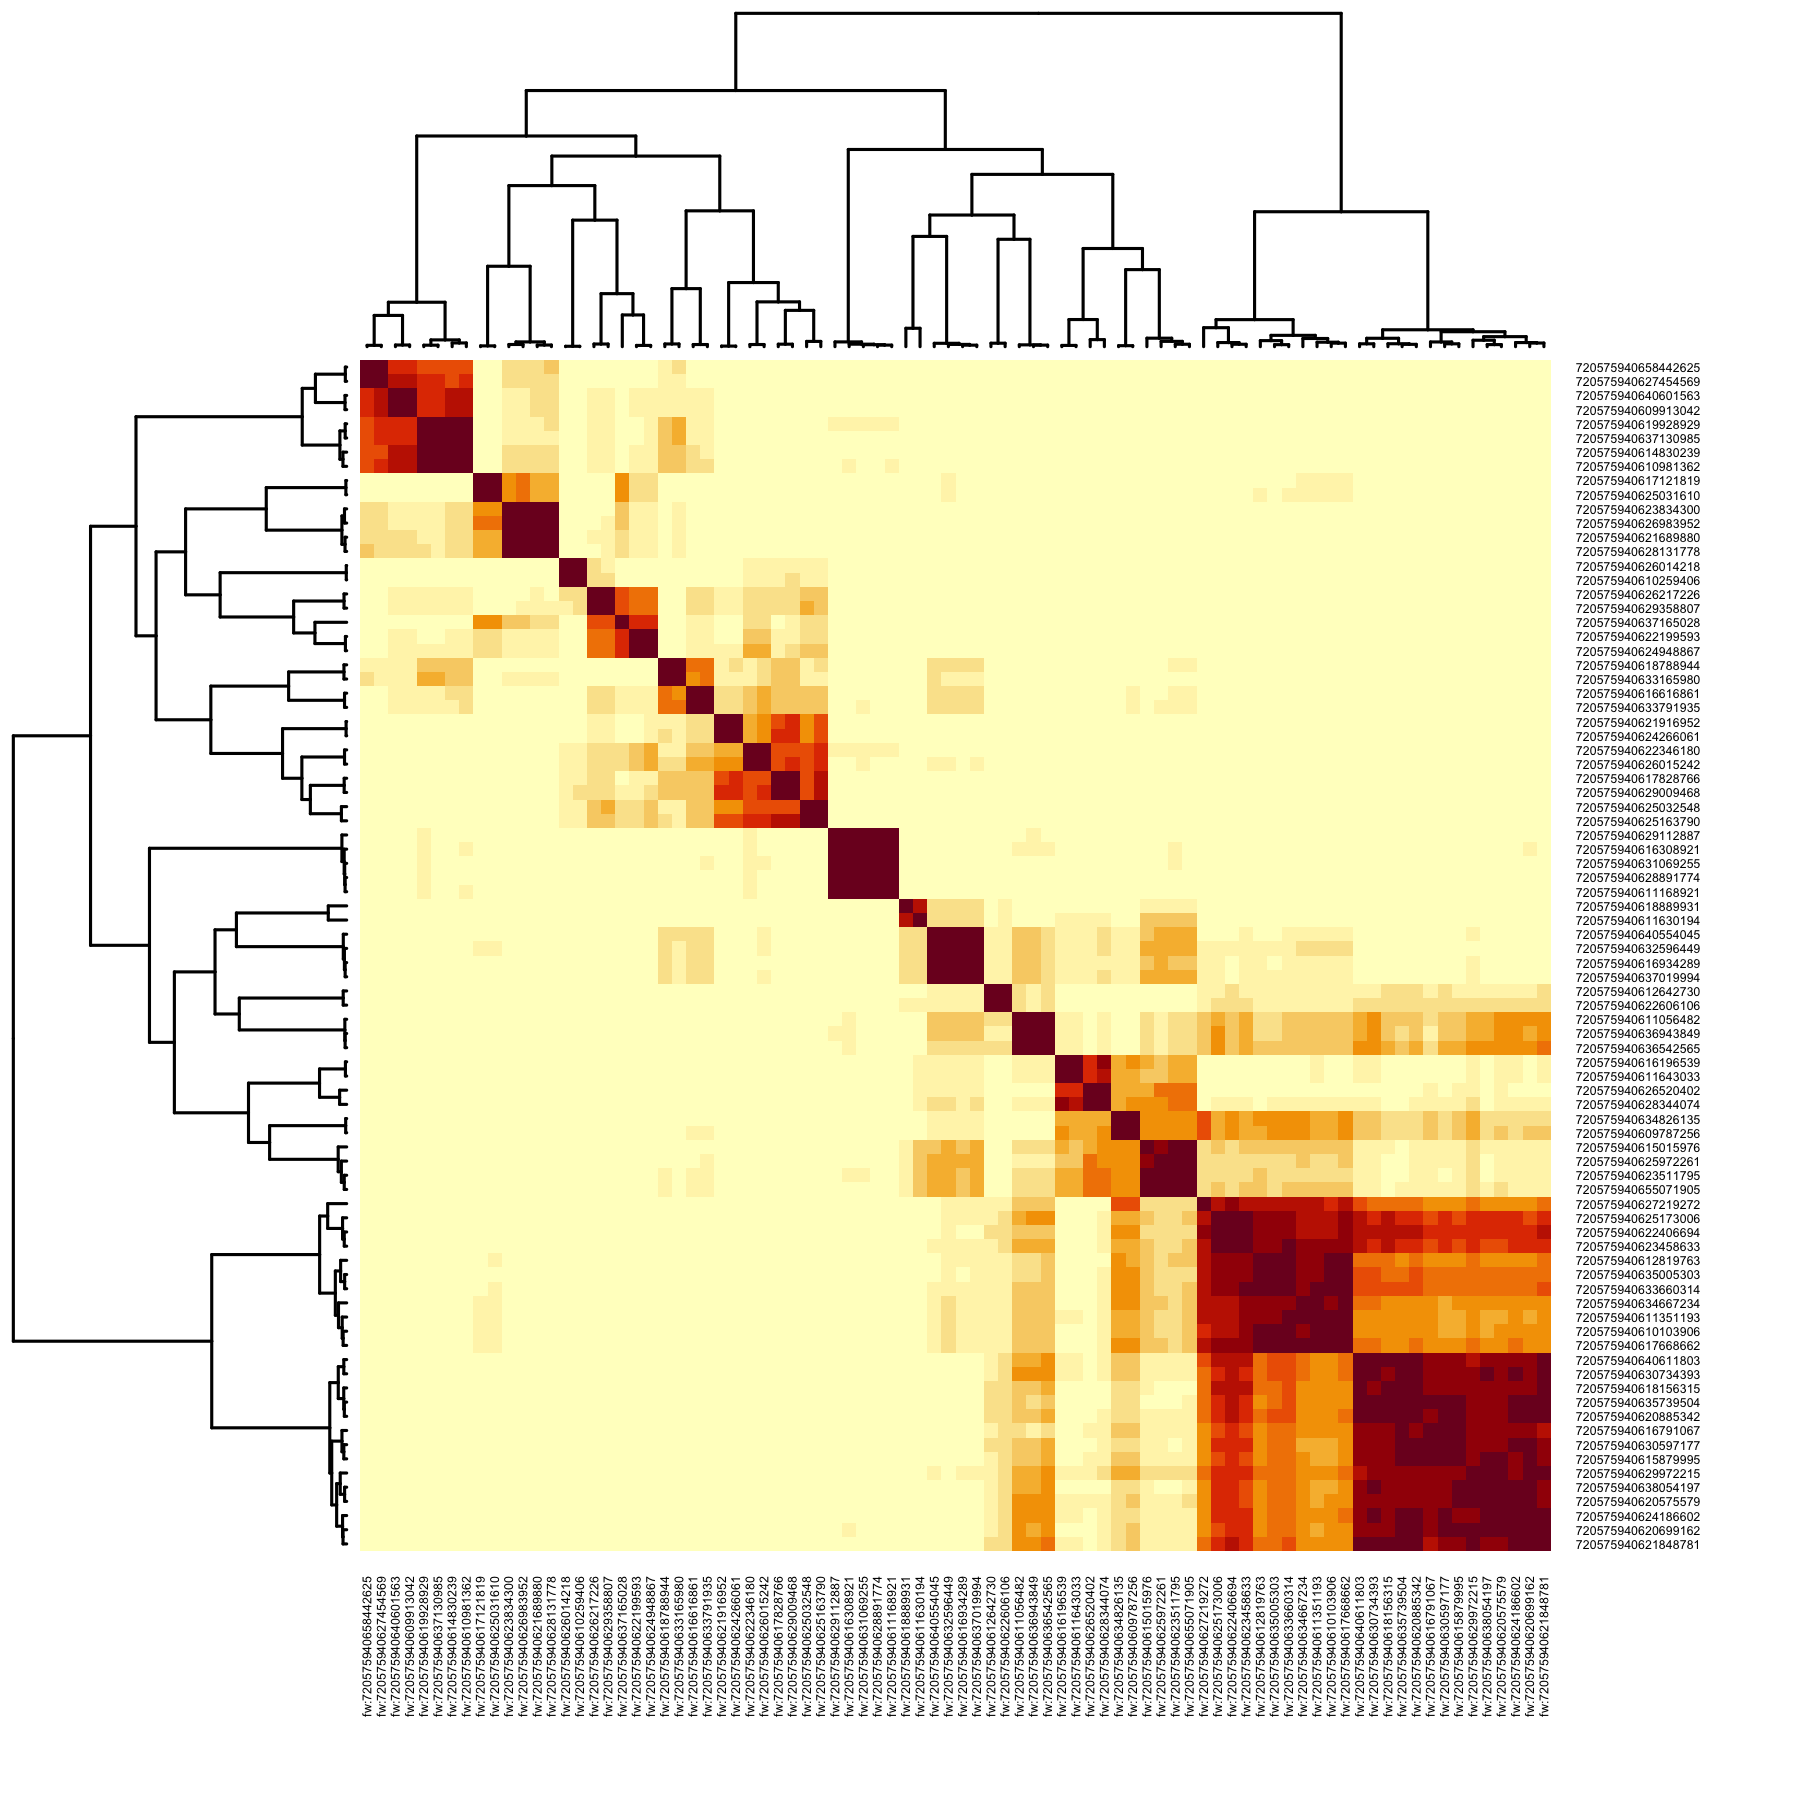

In [15]:
options(
  repr.plot.width  = 6,    # inches
  repr.plot.height = 6,    # inches
  repr.plot.res    = 300   # DPI (pixels per inch)
)


# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.3,  # Reduce font size for row labels
        cexCol = 0.3   # Reduce font size for column labels
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


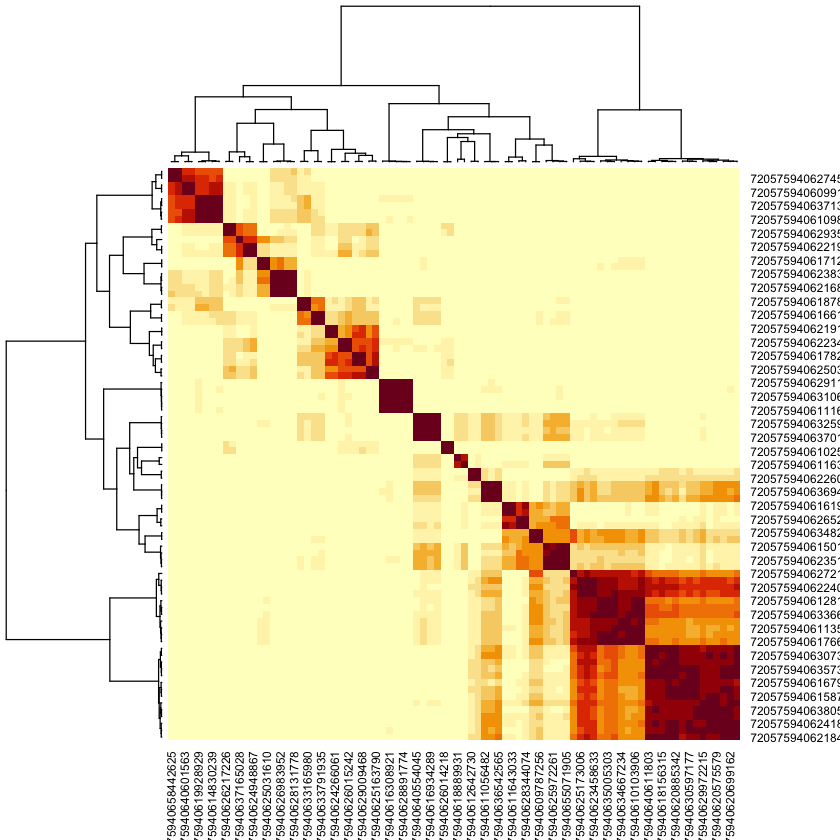

In [15]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')

apharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D"
))


In [ ]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')

apharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = TRUE,
        partners = "outputs",
        method = "ward.D2"
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”
Loading required package: shiny


Listening on http://127.0.0.1:5934



In [17]:
#-----------------------------

pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners = c("outputs", "inputs"), method = "ward.D2"))
dev.off()

#-----------------------------



Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 371/2085 neurons representing 925/17273 synapses due to missing ids!”


pdf 
  2

In [18]:
#----------------------------
apharyngeal = left_join(apharyngeal,aPhN,by = "id")
apharyngeal$side_name_id = paste(
apharyngeal$side,
apharyngeal$name,apharyngeal$id,sep="")

In [19]:



pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/Figure_1_WDo", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  "outputs", method = "ward.D", cexRow = 0.3, cexCol = 0.3))
dev.off()
#-----------------------------




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


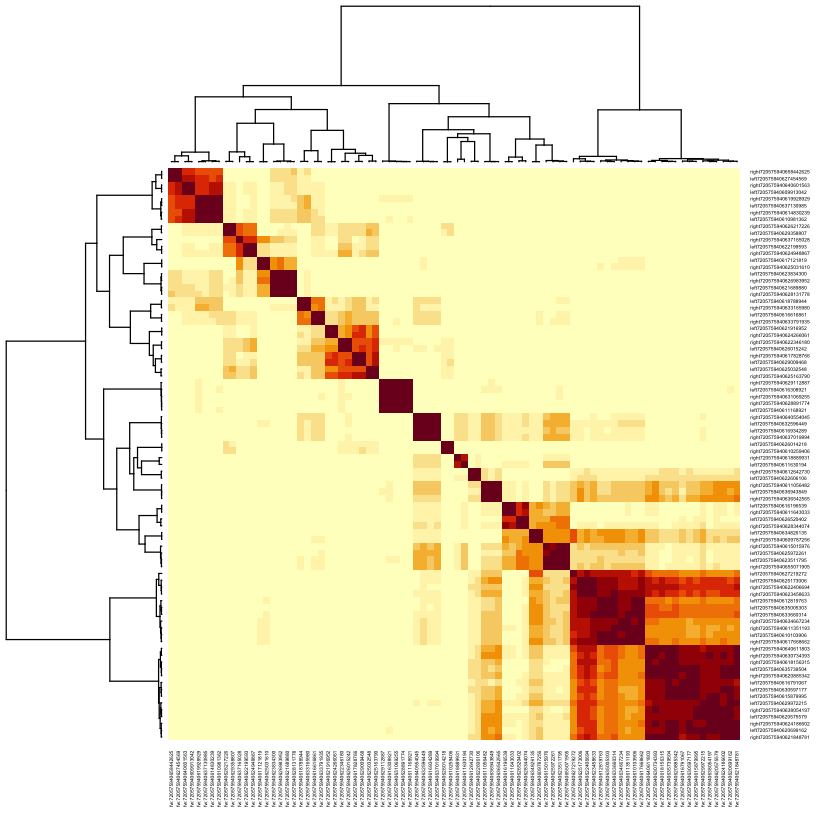

In [20]:

par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  "outputs", method = "ward.D", cexRow = 0.3, cexCol = 0.3))


In [21]:
apharyngeal = left_join(apharyngeal,aPhN,by = "id")
apharyngeal$side_name_id = paste(
apharyngeal$side,
apharyngeal$name,apharyngeal$id)

In [22]:


pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  c("outputs", "inputs"), method = "ward.D"))
dev.off()


#_______________________________

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 371/2085 neurons representing 925/17273 synapses due to missing ids!”


pdf 
  2

In [24]:
library(tidyverse)
library(coconatfly)
library(glue)
# Rename first column to 'id'
colnames(aPhN)[1] <- 'id'
# Retrieve metadata for all pharyngeal cells


hc <- cf_cosine_plot(
    apharyngeal$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE  # do not plot; return hclust
)

apharyngeal_meta <- cf_meta(hc)
apharyngeal_meta <- coconat::add_cluster_info(apharyngeal_meta, hc, h=0.75, idcol='key')




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


In [25]:
pdf(paste0(PATH_output, "aPhN1_dendrogram_wardd2.pdf"), width = 10, height = 6)
plot(hc,
     labels = apharyngeal_meta$id,
     hang = -0.01,
     cex = 0.7,
     main = "aPharyngeal1 Neuron Dendrogram")
dev.off()

pdf 
  2

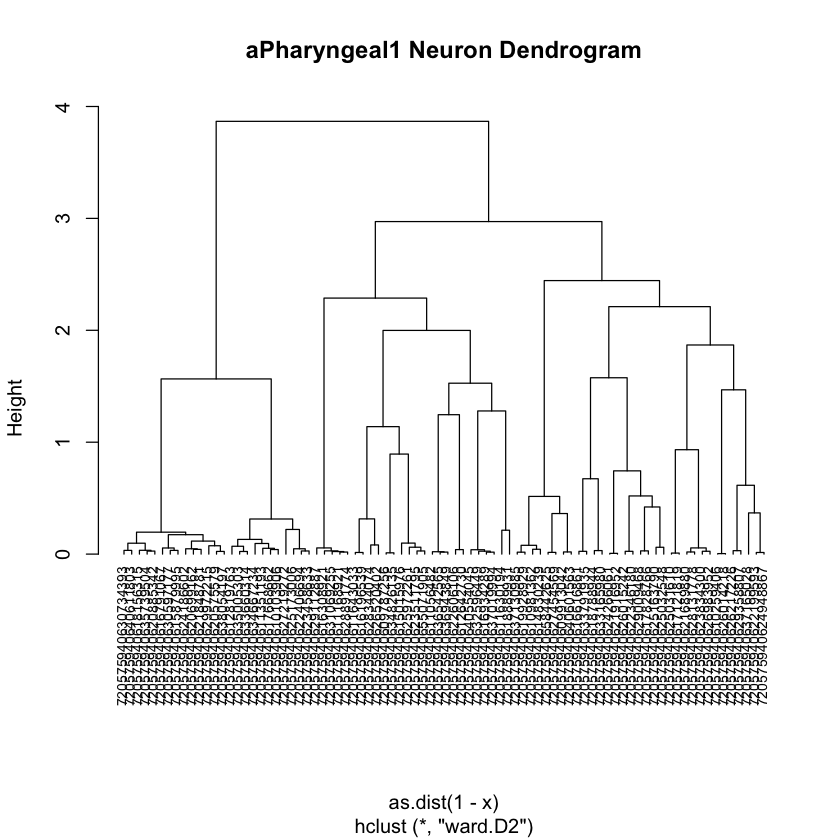

In [26]:
plot(
    hc,
    labels = apharyngeal_meta$id,  # <-- Use root IDs here
hang = -0.01,
cex = 0.7,
main = "aPharyngeal1 Neuron Dendrogram"
)


In [28]:
hc <- cf_cosine_plot(
    apharyngeal$key,
threshold = 1,
partners = "outputs",
method = "ward.D",
heatmap = FALSE  # do not plot; return hclust
)

apharyngeal_meta <- cf_meta(hc)
apharyngeal_meta <- coconat::add_cluster_info(apharyngeal_meta, hc, h=0.75, idcol='key')

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 518/7668 neurons representing 2742/65425 synapses due to missing ids!”


In [29]:
pdf(paste0(PATH_output, "aPhN_dendrogram_ward.pdf"), width = 10, height = 6)
plot(hc,
     labels = apharyngeal_meta$id,
     hang = -0.01,
     cex = 0.7,
     main = "aPharyngeal Neuron Dendrogram")
dev.off()

pdf 
  2

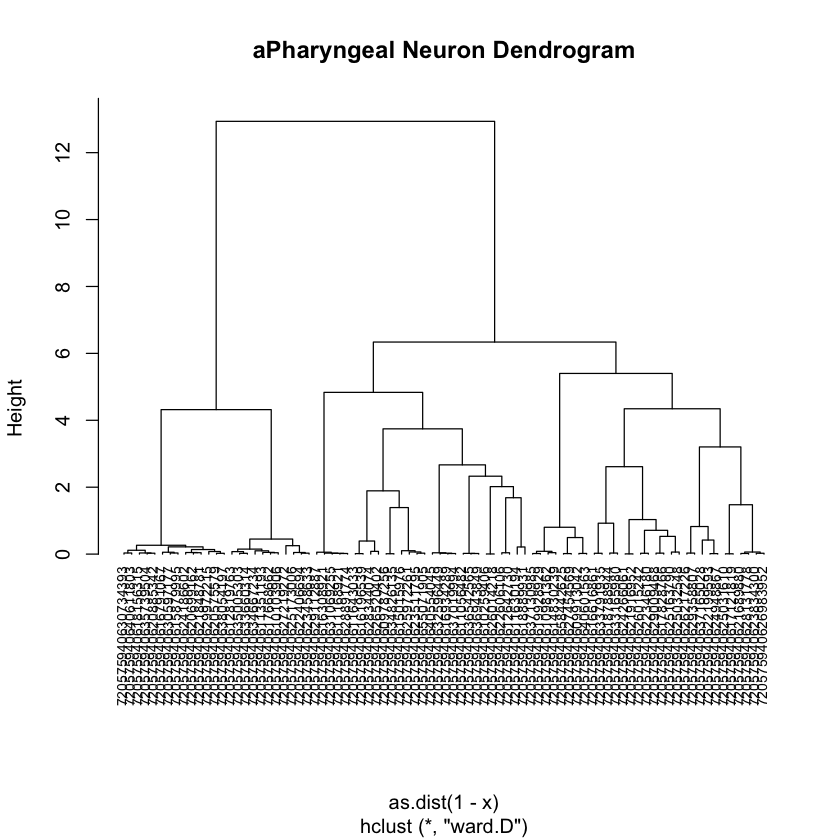

In [30]:
plot(
    hc,
    labels = apharyngeal_meta$id,  # <-- Use root IDs here
hang = -0.01,
cex = 0.7,
main = "aPharyngeal Neuron Dendrogram"
)


###############################################################################################################################################


In [31]:
################################################################################################################

In [16]:

#----Figure_1-------------------------------------------------------------------
#-------------------------------------------------------------------------------
# This is the code for aPhN1 clustering analysis, adapted from McKim et al. 2024
#-------------------------------------------------------------------------------

#-load packages-----------------------------------------------------------------
library(tidyverse)
library(coconatfly)

###general variables:-----------------------------------------------------------
set.seed(42)
options(scipen=999)

PATH_input = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN1_test/"
PATH_output = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN1_test/"
version <- "1.0"  # Specify version manually

In [17]:
input_files = list.files(path = PATH_input, full.names = FALSE, recursive = FALSE)




In [18]:
input_files_tmp = list.files(path = paste0(PATH_input,"tmp/"),
full.names = FALSE, recursive = FALSE)
input_files = c(input_files,input_files_tmp)
v = read_delim(paste0(PATH_input,"aPhN1_v1.0.csv"),
col_types  =  cols(version  =  col_character()),delim  =  ";")



Warning message:
“The following named parsers don't match the column names: version”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [19]:
v = v$version[1]

# set variables:----------------------------------------------------------------
aPhN1 = read_delim(paste0(PATH_input,"aPhN1_v1.0",v,".csv"),
col_types = cols(root_id = col_character()),delim = ",")

Warning message:
“Unknown or uninitialised column: `version`.”


In [20]:
#-------------------------------------------------------------------------------
#clustering of all endocrine cells
colnames(aPhN1)[1] <- 'id'
# paste0(aPhNid, collapse = ",")

#obtain meta data for all apharyngeal cells

In [21]:
#With putative DCSO
ids_string <- paste(c(
    "720575940627454569", "720575940658442625", "720575940640601563", "720575940609913042",
    "720575940619928929", "720575940637130985", "720575940614830239", "720575940610981362",
    "720575940617121819", "720575940625031610", "720575940621689880", "720575940628131778",
    "720575940623834300", "720575940626983952", "720575940622199593", "720575940624948867",
    "720575940626217226", "720575940629358807", "720575940637165028", "720575940631284511",
    "720575940628673474", "720575940638608803", "720575940616562150", "720575940626014218",
    "720575940610259406", "720575940621916952", "720575940624266061", "720575940622346180",
    "720575940626015242", "720575940617828766", "720575940629009468", "720575940625032548",
    "720575940625163790", "720575940628329546", "720575940635391845", "720575940632423394",
    "720575940621870349", "720575940618788944", "720575940633165980", "720575940616616861",
    "720575940633791935", "720575940638419534", "720575940623660558", "720575940630893196",
    "720575940611211417"

),
    collapse = " ")

In [22]:
#Without putative DCSO
ids_string <- paste(c(
    "720575940627454569", "720575940658442625", "720575940640601563", "720575940609913042",
    "720575940619928929", "720575940637130985", "720575940614830239", "720575940610981362",
    "720575940617121819", "720575940625031610", "720575940621689880", "720575940628131778",
    "720575940623834300", "720575940626983952", "720575940622199593", "720575940624948867",
    "720575940626217226", "720575940629358807", "720575940637165028", "720575940626014218",
    "720575940610259406", "720575940621916952", "720575940624266061", "720575940622346180",
    "720575940626015242", "720575940617828766", "720575940629009468", "720575940625032548",
    "720575940625163790", "720575940618788944", "720575940633165980", "720575940616616861",
    "720575940633791935"
),
    collapse = " ")


In [24]:
ids_string

[1] "720575940627454569 720575940658442625 720575940640601563 720575940609913042 720575940619928929 720575940637130985 720575940614830239 720575940610981362 720575940617121819 720575940625031610 720575940621689880 720575940628131778 720575940623834300 720575940626983952 720575940622199593 720575940624948867 720575940626217226 720575940629358807 720575940637165028 720575940626014218 720575940610259406 720575940621916952 720575940624266061 720575940622346180 720575940626015242 720575940617828766 720575940629009468 720575940625032548 720575940625163790 720575940618788944 720575940633165980 720575940616616861 720575940633791935"

In [25]:
# Now, retrieve metadata for all root IDs using the concatenated string
apharyngeal1 <- cf_meta(cf_ids(ids_string, datasets = "flywire"))

In [26]:
apharyngeal1 = left_join(apharyngeal1,aPhN1,by = "id")
apharyngeal1$side_name_id = paste(
apharyngeal1$side,
apharyngeal1$name,apharyngeal1$id,sep="")

In [27]:
library(bit64)

apharyngeal_partners <- apharyngeal1 %>%
cf_partners(
threshold = 5,        # Minimum synapse count
partners = "outputs"  # Focus on output synapses
)

# 4. Aggregate synapse counts per neuron
output_counts <- apharyngeal_partners %>%
group_by(pre_id) %>%
summarise(output_count = sum(weight))

# 5. Convert pre_id to character for compatibility
output_counts <- output_counts %>%
mutate(pre_id = as.character(pre_id))

# 6. Join counts back to metadata
apharyngeal1 <- apharyngeal1 %>%
left_join(output_counts, by = c("id" = "pre_id")) %>%
filter(output_count >= 5)

In [43]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
pdf(
paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/General - YaoLabUF/SVG_figs/FigS2/aPhN1_WD2o", v, ".pdf"),
width = 15,  # Increase width further
height = 10  # Increase height further
)
par(mar = c(15, 15, 4, 15) + .1)  # Adjust margins to make space for labels
apharyngeal1 %>%
with(cf_cosine_plot(
key,
threshold = 1,
labRow = id,  # Use raw root IDs for labels
interactive = FALSE,
partners = "outputs",
method = "ward.D2",
cexRow = 0.8,  # Reduce font size for row labels
cexCol = 0.4   # Reduce font size for column labels
))
dev.off()

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


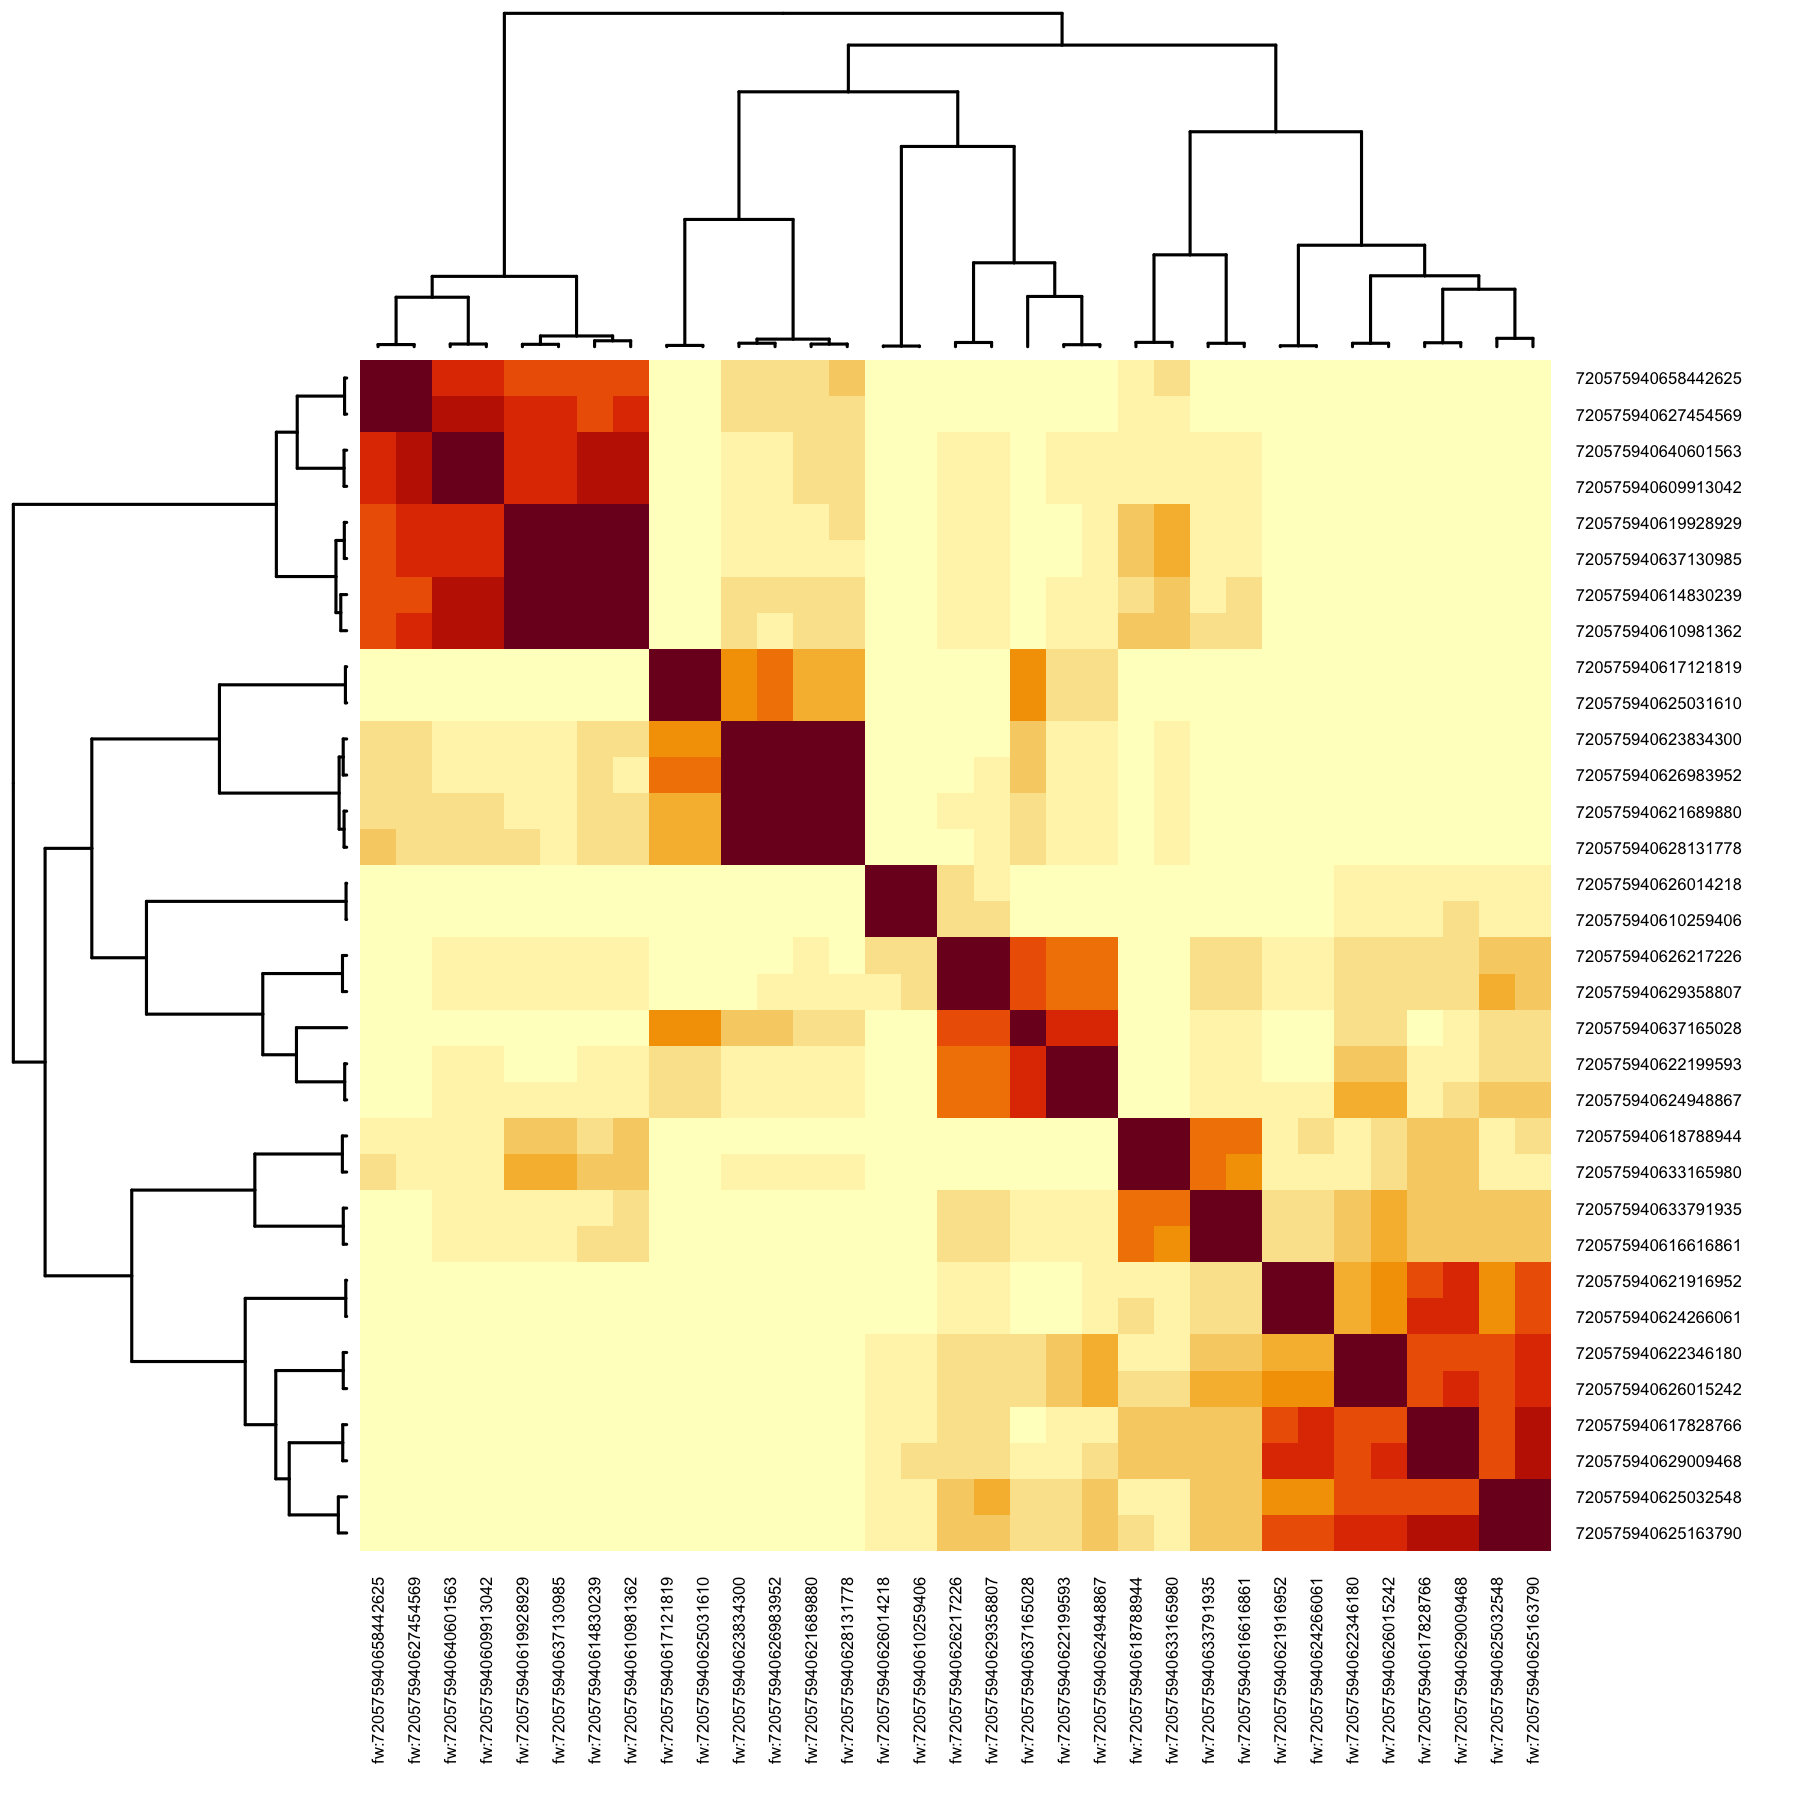

In [30]:

par(mar = c(15, 15, 4, 15) + .1)  # Adjust margins to make space for labels
apharyngeal1 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.4,  # Reduce font size for row labels
        cexCol = 0.4   # Reduce font size for column labels
))


In [48]:
#-----------------------------

pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN1_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal1 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners = c("outputs", "inputs"), method = "ward.D2"))
dev.off()

#-----------------------------

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 196/1407 neurons representing 618/11563 synapses due to missing ids!”


pdf 
  2

In [49]:
#----------------------------
apharyngeal1 = left_join(apharyngeal1,aPhN1,by = "id")
apharyngeal1$side_name_id = paste(
apharyngeal1$side,
apharyngeal1$name,apharyngeal1$id,sep="")

In [50]:



pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN1_test/Figure_1_WDo", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal1 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  "outputs", method = "ward.D"))
dev.off()
#-----------------------------

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


pdf 
  2

In [51]:
apharyngeal1 = left_join(apharyngeal1,aPhN1,by = "id")
apharyngeal1$side_name_id = paste(
apharyngeal1$side,
apharyngeal1$name,apharyngeal1$id)

In [52]:


pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN1_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal1 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  c("outputs", "inputs"), method = "ward.D"))
dev.off()


#_______________________________

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 196/1407 neurons representing 618/11563 synapses due to missing ids!”


pdf 
  2

In [55]:
library(tidyverse)
library(coconatfly)
library(glue)
# Rename first column to 'id'
colnames(aPhN1)[1] <- 'id'
# Retrieve metadata for all apharyngeal1 cells


hc <- cf_cosine_plot(
    apharyngeal1$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE  # do not plot; return hclust
)

apharyngeal1_meta <- cf_meta(hc)
apharyngeal1_meta <- coconat::add_cluster_info(apharyngeal1_meta, hc, h=0.75, idcol='key')




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


In [56]:
names(apharyngeal1_meta)


[1] "id"             "supervoxel_id"  "side"           "flow"          
 [5] "class"          "subclass"       "subsubclass"    "type"          
 [9] "top_nt"         "lineage"        "hemibrain_type" "fbbt_id"       
[13] "group"          "instance"       "dataset"        "key"           
[17] "dendid"         "group_h0.75"

In [57]:
pdf(paste0(PATH_output, "aPhN1_dendrogram_wardd2.pdf"), width = 10, height = 6)
plot(hc,
     labels = apharyngeal1_meta$id,
     hang = -0.01,
     cex = 0.7,
     main = "apharyngeal1 Neuron Dendrogram")
dev.off()

pdf 
  2

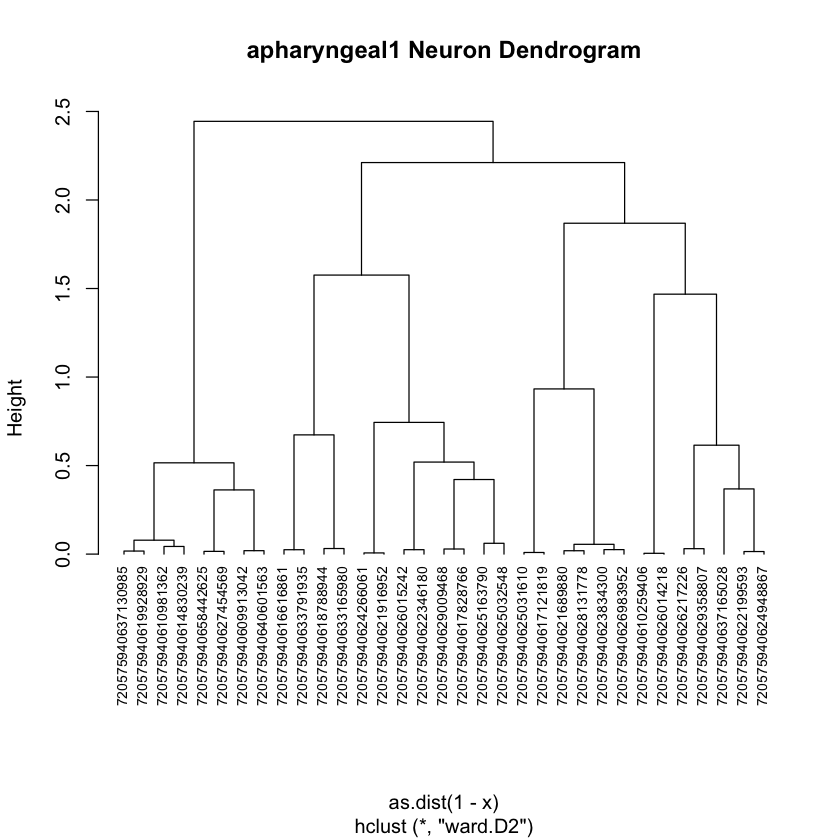

In [58]:
plot(
    hc,
    labels = apharyngeal1_meta$id,  # <-- Use root IDs here
hang = -0.01,
cex = 0.7,
main = "apharyngeal1 Neuron Dendrogram"
)


Registered S3 method overwritten by 'dendextend':
  method        from        
  labels.hclust dendroextras


---------------------
Welcome to dendextend version 1.19.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:nat’:

    prune


The following object is masked from ‘package:stats’:

    cutree



Attaching package: ‘dendroextras’


The following object is masked from ‘package:dendextend’:

    labels<-


The following object is masked

pdf 
  2

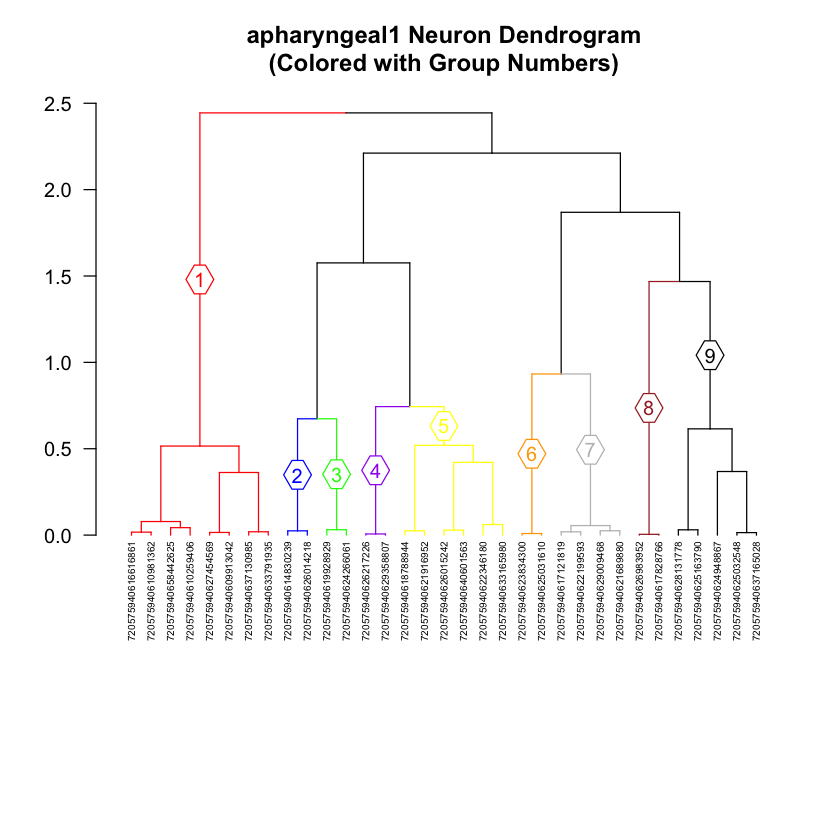

In [60]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)

# Convert the hclust object to a dendrogram
dend <- as.dendrogram(hc)

# Update the dendrogram labels to display your root IDs.
labels(dend) <- apharyngeal1_meta$id

# Color the dendrogram into 6 groups with numeric labels.
dend_colored <- colour_clusters(dend,
                                k = 9,
                                col = c("red", "blue", "green", "purple", "yellow", "orange", "gray", "brown", "black"),
                                groupLabels = TRUE)
# Adjust label font size
dend_colored <- set(dend_colored, "labels_cex", 0.5)  # Change font size (0.5 = smaller)

# Save to PDF
pdf(paste0(PATH_output, "aPhN1_dendrogram_colored.pdf"), width = 10, height = 6)
par(mar = c(12, 4, 4, 2))  # Increase bottom margin for labels
plot(dend_colored,
     main = "apharyngeal1 Neuron Dendrogram\n(Colored with Group Numbers)",
     las = 2)  # Keep labels rotated for better spacing
dev.off()

# Display in RStudio
par(mar = c(12, 4, 4, 2))
plot(dend_colored,
     main = "apharyngeal1 Neuron Dendrogram\n(Colored with Group Numbers)",
     las = 2)


In [62]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)

#---------------------------------------------------------------------
# Step 1: Get the native hclust object from cf_cosine_plot
#         (with heatmap = FALSE so that coconatfly computes its native ordering)
#---------------------------------------------------------------------
native_hc <- cf_cosine_plot(
    apharyngeal1$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE
)

#---------------------------------------------------------------------
# Step 2: Use dendroextras' colour_clusters() directly on the native hclust.
#         This will convert native_hc to a dendrogram internally while preserving its ordering.
#         Here we cut into 6 groups, assign a vector of colors, and add numeric group labels.
#---------------------------------------------------------------------
custom_dend <- colour_clusters(
    native_hc,
    k = 6,
    col = c("red", "blue", "green", "purple", "yellow", "orange"),
    groupLabels = TRUE
)

#---------------------------------------------------------------------
# Step 3: Update the dendrogram labels to show your root IDs.
#         (Assumes that pharyngeal_meta$id holds the desired labels.)
#         Since colour_clusters() internally converts the hclust to a dendrogram,
#         you can now set the labels.
#---------------------------------------------------------------------
labels(custom_dend) <- apharyngeal_metapharyngeal_meta$id

# Optionally, adjust the leaf label font size so that long root IDs are not too large.
custom_dend <- set(custom_dend, "labels_cex", 0.5)

#---------------------------------------------------------------------
# Step 4: Plot the native coconatfly heatmap but supply your modified dendrogram.
#         This preserves the native ordering while showing the custom colors and numeric group labels.
#---------------------------------------------------------------------
pdf(paste0(PATH_output, "aPhN1_heatmap_native_ordering_modified.pdf"), width = 15, height = 10)
par(mar = c(15, 15, 4, 15) + 0.1)  # Increase margins to accommodate rotated labels if needed
apharyngeal1 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,          # Use raw root IDs for row labels in the heatmap
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,         # Row label size for the heatmap
        cexCol = 0.8,         # Column label size
        Rowv = custom_dend    # Supply the custom dendrogram with native ordering preserved
))
dev.off()

# Optionally, display the heatmap in the RStudio plotting window:
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal1 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = custom_dend
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


ERROR: Error: object 'apharyngeal_metapharyngeal_meta' not found


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 204/4384 neurons representing 703/38837 synapses due to missing ids!”


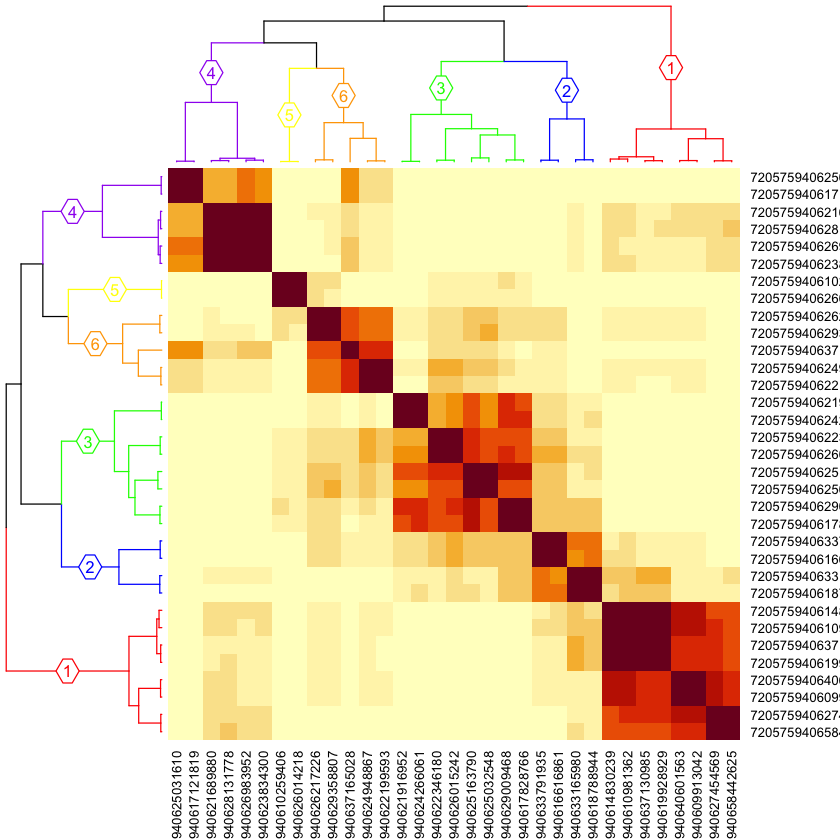

In [63]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)
library(seriation)

set.seed(42)
options(scipen=999)

#---------------------------------------------------------------------
# Step 1: Obtain the native hclust object from cf_cosine_plot (native ordering)
#---------------------------------------------------------------------
native_hc <- cf_cosine_plot(
    apharyngeal1$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE
)

# Convert to a dendrogram.
native_dend <- as.dendrogram(native_hc)

#---------------------------------------------------------------------
# Step 2: Set the labels on the native dendrogram to your root IDs.
#         Also, force the cosine matrix to use the same labels.
#         (Make sure apharyngeal1_meta$id is in the same order as native_hc's labels.)
#---------------------------------------------------------------------
# Replace the native dendrogram labels with your desired labels:
labels(native_dend) <- apharyngeal1_meta$id

# Extract the cosine similarity matrix:
cosine_matrix <- cf_cosine_plot(
    apharyngeal1$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
matrix = TRUE
)

# Force the rownames and colnames of the cosine matrix to be your root IDs:
rownames(cosine_matrix) <- apharyngeal1_meta$id
colnames(cosine_matrix) <- apharyngeal1_meta$id

#---------------------------------------------------------------------
# Step 3: Decorate the dendrogram with colors and numeric group labels.
#         Here we cut into 6 groups.
#---------------------------------------------------------------------
decorated_dend <- colour_clusters(
    native_dend,
    k = 6,
    col = c("red", "blue", "green", "purple", "yellow", "orange"),
    groupLabels = TRUE
)

# Optionally adjust leaf label font size.
decorated_dend <- set(decorated_dend, "labels_cex", 0.5)

#---------------------------------------------------------------------
# Step 4: Compute the distance (dissimilarity) matrix.
#         Here, dissimilarity = 1 - cosine similarity.
#---------------------------------------------------------------------
diss <- as.dist(1 - cosine_matrix)

# Double-check that the labels match:
if (!identical(sort(labels(decorated_dend)), sort(attr(diss, "Labels")))) {
stop("The labels of the dendrogram and the distance object do not match!")
}

#---------------------------------------------------------------------
# Step 5: Reorder (seriate) the decorated dendrogram using the distance matrix.
#---------------------------------------------------------------------
decorated_dend_ordered <- seriate_dendrogram(decorated_dend, diss, method = "OLO")

#---------------------------------------------------------------------
# Step 6: Plot the heat map using coconatfly's native heat map function,
#         supplying the decorated (and re-ordered) dendrogram via Rowv.
#---------------------------------------------------------------------
pdf(paste0(PATH_output, "aPhN1_heatmap_with_seriated_custom_dendrogram.pdf"),
    width = 15, height = 10)
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal1%>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,          # Use raw root IDs for row labels in the heatmap
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = decorated_dend_ordered   # Use our re-ordered, decorated dendrogram
))
dev.off()


# Also display in RStudio's plotting window:
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal1 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = decorated_dend_ordered
))


###################################################################################################################################################################

In [1]:

#----Figure_1-------------------------------------------------------------------
#-------------------------------------------------------------------------------
# This is the code for aPhN2 clustering analysis, adapted from McKim et al. 2024
#-------------------------------------------------------------------------------

#-load packages-----------------------------------------------------------------
library(tidyverse)
library(coconatfly)

###general variables:-----------------------------------------------------------
set.seed(42)
options(scipen=999)

PATH_input = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN2_test/"
PATH_output = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN2_test/"
version <- "1.0"  # Specify version manually

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: nat

Loading required package: rgl

Registered S3 method overwritten by 'nat':
  method             from
  as.mesh3d.ashape3d rgl 

Some nat functions depend on a CMTK installation. See ?cmtk and README.md for details.


Attaching package: ‘nat’


The following object is masked from ‘package:rgl’:

    wire3d


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘packag

In [2]:
input_files = list.files(path = PATH_input, full.names = FALSE, recursive = FALSE)




In [3]:
input_files_tmp = list.files(path = paste0(PATH_input,"tmp/"),
full.names = FALSE, recursive = FALSE)
input_files = c(input_files,input_files_tmp)
v = read_delim(paste0(PATH_input,"aPhN2_v1.0.csv"),
col_types  =  cols(version  =  col_character()),delim  =  ";")



Warning message:
“The following named parsers don't match the column names: version”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [4]:
v = v$version[1]

# set variables:----------------------------------------------------------------
aPhN2 = read_delim(paste0(PATH_input,"aPhN2_v1.0",v,".csv"),
col_types = cols(root_id = col_character()),delim = ",")

Warning message:
“Unknown or uninitialised column: `version`.”


In [5]:
#-------------------------------------------------------------------------------
#clustering of all endocrine cells
colnames(aPhN2)[1] <- 'id'
# paste0(aPhNid, collapse = ",")

#obtain meta data for all apharyngeal2 cells

In [6]:
ids_string <- paste(c(
"720575940627219272", "720575940625173006", "720575940622406694", "720575940623458633",
"720575940612819763", "720575940635005303", "720575940633660314", "720575940634667234",
"720575940611351193", "720575940610103906", "720575940617668662", "720575940640611803",
"720575940630734393", "720575940618156315", "720575940635739504", "720575940620885342",
"720575940616791067", "720575940630597177", "720575940615879995", "720575940629972215",
"720575940638054197", "720575940620575579", "720575940624186602", "720575940620699162",
"720575940621848781", "720575940629112887", "720575940616308921", "720575940631069255",
"720575940611168921", "720575940628891774", "720575940618889931", "720575940611630194",
"720575940640554045", "720575940632596449", "720575940616934289", "720575940637019994",
"720575940612642730", "720575940622606106", "720575940611056482", "720575940636943849",
"720575940636542565", "720575940616196539", "720575940611643033", "720575940626520402",
"720575940628344074", "720575940634826135", "720575940609787256", "720575940615015976",
"720575940625972261", "720575940623511795", "720575940655071905"
),
    collapse = " ")

In [8]:
ids_string

[1] "720575940627219272 720575940625173006 720575940622406694 720575940623458633 720575940612819763 720575940635005303 720575940633660314 720575940634667234 720575940611351193 720575940610103906 720575940617668662 720575940640611803 720575940630734393 720575940618156315 720575940635739504 720575940620885342 720575940616791067 720575940630597177 720575940615879995 720575940629972215 720575940638054197 720575940620575579 720575940624186602 720575940620699162 720575940621848781 720575940629112887 720575940616308921 720575940631069255 720575940611168921 720575940628891774 720575940618889931 720575940611630194 720575940640554045 720575940632596449 720575940616934289 720575940637019994 720575940612642730 720575940622606106 720575940611056482 720575940636943849 720575940636542565 720575940616196539 720575940611643033 720575940626520402 720575940628344074 720575940634826135 720575940609787256 720575940615015976 720575940625972261 720575940623511795 720575940655071905"

In [9]:



# Now, retrieve metadata for all root IDs using the concatenated string
apharyngeal2 <- cf_meta(cf_ids(ids_string, datasets = "flywire"))


Loading required namespace: git2r



In [10]:
apharyngeal2 = left_join(apharyngeal2,aPhN2,by = "id")
apharyngeal2$side_name_id = paste(
apharyngeal2$side,
apharyngeal2$name,apharyngeal2$id,sep="")

In [11]:
library(bit64)

apharyngeal2_partners <- apharyngeal2 %>%
cf_partners(
threshold = 5,        # Minimum synapse count
partners = "outputs"  # Focus on output synapses
)

# 4. Aggregate synapse counts per neuron
output_counts <- apharyngeal2_partners %>%
group_by(pre_id) %>%
summarise(output_count = sum(weight))

# 5. Convert pre_id to character for compatibility
output_counts <- output_counts %>%
mutate(pre_id = as.character(pre_id))

# 6. Join counts back to metadata
apharyngeal2 <- apharyngeal2 %>%
left_join(output_counts, by = c("id" = "pre_id")) %>%
filter(output_count >= 5)

Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:dplyr’:

    symdiff


The following object is masked from ‘package:base’:

    xor


Attaching package bit64

package:bit64 (c) 2011-2017 Jens Oehlschlaegel

creators: integer64 runif64 seq :

coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bitstring

logical operator: ! & | xor != == < <= >= >

arithmetic operator: + - * / %/% %% ^

math: sign abs sqrt log log2 log10

math: floor ceiling trunc round

querying: is.integer64 is.vector [is.atomic} [length] format print str

values: is.na is.nan is.finite is.infinite

aggregation: any all min max range sum prod

cumulation: diff cummin cummax cumsum cumprod

access: length<- [ [<- [[ [[<-

combine: c rep cbind rbind as.data.frame

WARNING don't use as subscripts

WARNING semantics differ from integer

for more help type ?bit64


Attaching package: ‘bit64’


The following object is masked from ‘package:u

In [16]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
svg(
paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/General - YaoLabUF/SVG_figs/FigS2/aPhN2/aPhN2_WD2o", v, ".svg"),
width = 15,  # Increase width further
height = 10  # Increase height further
)
par(mar = c(15, 15, 4, 15) + .1)  # Adjust margins to make space for labels
apharyngeal2 %>%
with(cf_cosine_plot(
key,
threshold = 1,
labRow = id,  # Use raw root IDs for labels
interactive = FALSE,
partners = "outputs",
method = "ward.D2",
cexRow = 0.8,  # Reduce font size for row labels
cexCol = 0.4   # Reduce font size for column labels
))
dev.off()

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


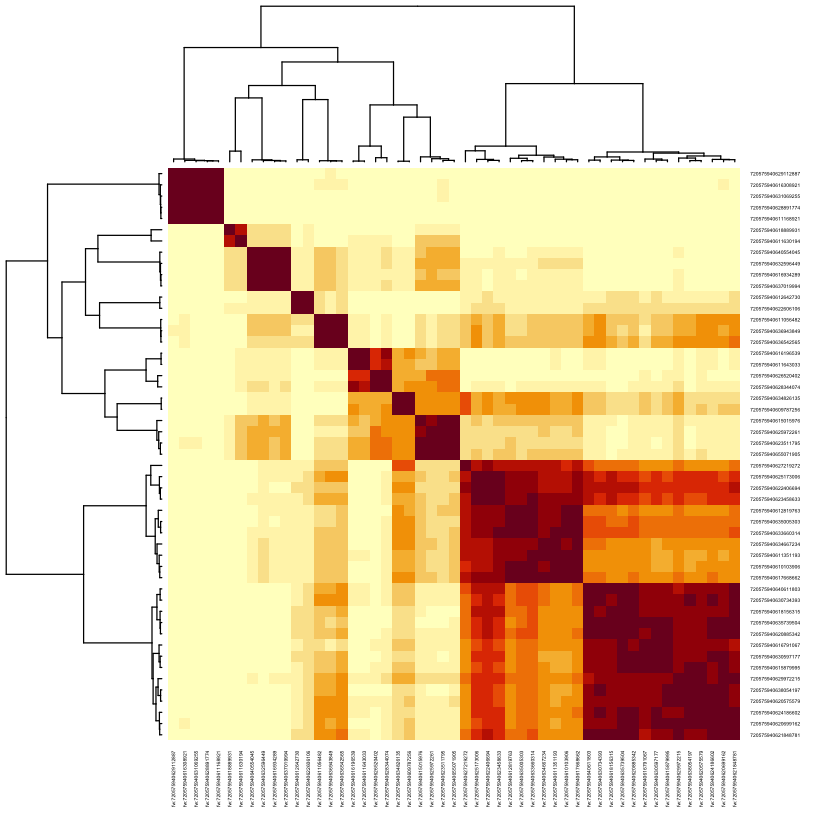

In [14]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
par(mar = c(15, 15, 4, 15) + .1)  # Adjust margins to make space for labels
apharyngeal2 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.3,  # Reduce font size for row labels
        cexCol = 0.3   # Reduce font size for column labels
))


In [79]:
#-----------------------------

pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN2_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners = c("outputs", "inputs"), method = "ward.D2"))
dev.off()

#-----------------------------



Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 175/678 neurons representing 307/5710 synapses due to missing ids!”


pdf 
  2

In [80]:
#----------------------------
apharyngeal2 = left_join(apharyngeal2,aPhN2,by = "id")
apharyngeal2$side_name_id = paste(
apharyngeal2$side,
apharyngeal2$name,apharyngeal2$id,sep="")

In [81]:
pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN2_test/Figure_1_WDo", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  "outputs", method = "ward.D"))
dev.off()
#-----------------------------




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


pdf 
  2

In [82]:
apharyngeal2 = left_join(apharyngeal2,aPhN2,by = "id")
apharyngeal2$side_name_id = paste(
apharyngeal2$side,
apharyngeal2$name,apharyngeal2$id)

In [83]:


pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN2_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  c("outputs", "inputs"), method = "ward.D"))
dev.off()


#_______________________________

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 175/678 neurons representing 307/5710 synapses due to missing ids!”


pdf 
  2

In [86]:
library(tidyverse)
library(coconatfly)
library(glue)
# Rename first column to 'id'
colnames(aPhN2)[1] <- 'id'
# Retrieve metadata for all apharyngeal2 cells


hc <- cf_cosine_plot(
    apharyngeal2$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE  # do not plot; return hclust
)

apharyngeal2_meta <- cf_meta(hc)
apharyngeal2_meta <- coconat::add_cluster_info(apharyngeal2_meta, hc, h=0.75, idcol='key')




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


In [87]:
names(apharyngeal2_meta)


[1] "id"             "supervoxel_id"  "side"           "flow"          
 [5] "class"          "subclass"       "subsubclass"    "type"          
 [9] "top_nt"         "lineage"        "hemibrain_type" "fbbt_id"       
[13] "group"          "instance"       "dataset"        "key"           
[17] "dendid"         "group_h0.75"

In [88]:
pdf(paste0(PATH_output, "aPhN2_dendrogram_wardd2.pdf"), width = 10, height = 6)
plot(hc,
     labels = apharyngeal2_meta$id,
     hang = -0.01,
     cex = 0.7,
     main = "apharyngeal2 Neuron Dendrogram")
dev.off()

pdf 
  2

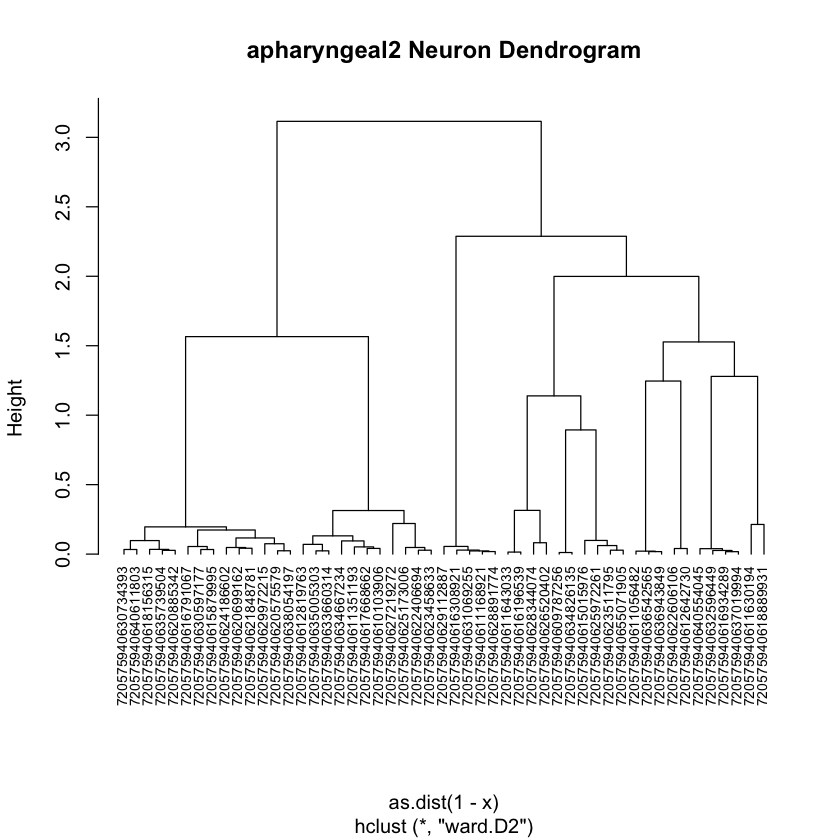

In [89]:
plot(
    hc,
    labels = apharyngeal2_meta$id,  # <-- Use root IDs here
hang = -0.01,
cex = 0.7,
main = "apharyngeal2 Neuron Dendrogram"
)


pdf 
  2

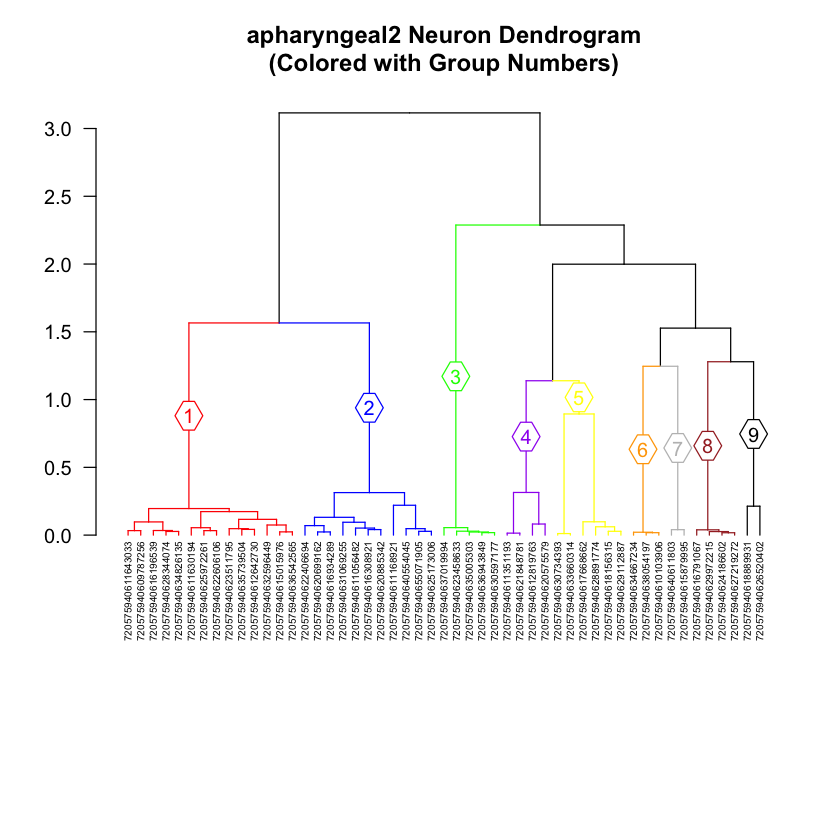

In [91]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)

# Convert the hclust object to a dendrogram
dend <- as.dendrogram(hc)

# Update the dendrogram labels to display your root IDs.
labels(dend) <- apharyngeal2_meta$id

# Color the dendrogram into 6 groups with numeric labels.
dend_colored <- colour_clusters(dend,
                                k = 9,
                                col = c("red", "blue", "green", "purple", "yellow", "orange", "gray", "brown", "black"),
                                groupLabels = TRUE)
# Adjust label font size
dend_colored <- set(dend_colored, "labels_cex", 0.5)  # Change font size (0.5 = smaller)

# Save to PDF
pdf(paste0(PATH_output, "aPhN2_dendrogram_colored.pdf"), width = 10, height = 6)
par(mar = c(12, 4, 4, 2))  # Increase bottom margin for labels
plot(dend_colored,
     main = "apharyngeal2 Neuron Dendrogram\n(Colored with Group Numbers)",
     las = 2)  # Keep labels rotated for better spacing
dev.off()

# Display in RStudio
par(mar = c(12, 4, 4, 2))
plot(dend_colored,
     main = "apharyngeal2 Neuron Dendrogram\n(Colored with Group Numbers)",
     las = 2)


In [93]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)

#---------------------------------------------------------------------
# Step 1: Get the native hclust object from cf_cosine_plot
#         (with heatmap = FALSE so that coconatfly computes its native ordering)
#---------------------------------------------------------------------
native_hc <- cf_cosine_plot(
    apharyngeal2$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE
)

#---------------------------------------------------------------------
# Step 2: Use dendroextras' colour_clusters() directly on the native hclust.
#         This will convert native_hc to a dendrogram internally while preserving its ordering.
#         Here we cut into 6 groups, assign a vector of colors, and add numeric group labels.
#---------------------------------------------------------------------
custom_dend <- colour_clusters(
    native_hc,
    k = 6,
    col = c("red", "blue", "green", "purple", "yellow", "orange"),
    groupLabels = TRUE
)

#---------------------------------------------------------------------
# Step 3: Update the dendrogram labels to show your root IDs.
#         (Assumes that pharyngeal_meta$id holds the desired labels.)
#         Since colour_clusters() internally converts the hclust to a dendrogram,
#         you can now set the labels.
#---------------------------------------------------------------------
labels(custom_dend) <- apharyngeal2_metapharyngeal2_meta$id

# Optionally, adjust the leaf label font size so that long root IDs are not too large.
custom_dend <- set(custom_dend, "labels_cex", 0.5)

#---------------------------------------------------------------------
# Step 4: Plot the native coconatfly heatmap but supply your modified dendrogram.
#         This preserves the native ordering while showing the custom colors and numeric group labels.
#---------------------------------------------------------------------
pdf(paste0(PATH_output, "aPhN2_heatmap_native_ordering_modified.pdf"), width = 15, height = 10)
par(mar = c(15, 15, 4, 15) + 0.1)  # Increase margins to accommodate rotated labels if needed
apharyngeal2 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,          # Use raw root IDs for row labels in the heatmap
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,         # Row label size for the heatmap
        cexCol = 0.8,         # Column label size
        Rowv = custom_dend    # Supply the custom dendrogram with native ordering preserved
))
dev.off()

# Optionally, display the heatmap in the RStudio plotting window:
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = custom_dend
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


ERROR: Error: object 'apharyngeal2_metapharyngeal2_meta' not found


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 314/3284 neurons representing 2039/26588 synapses due to missing ids!”


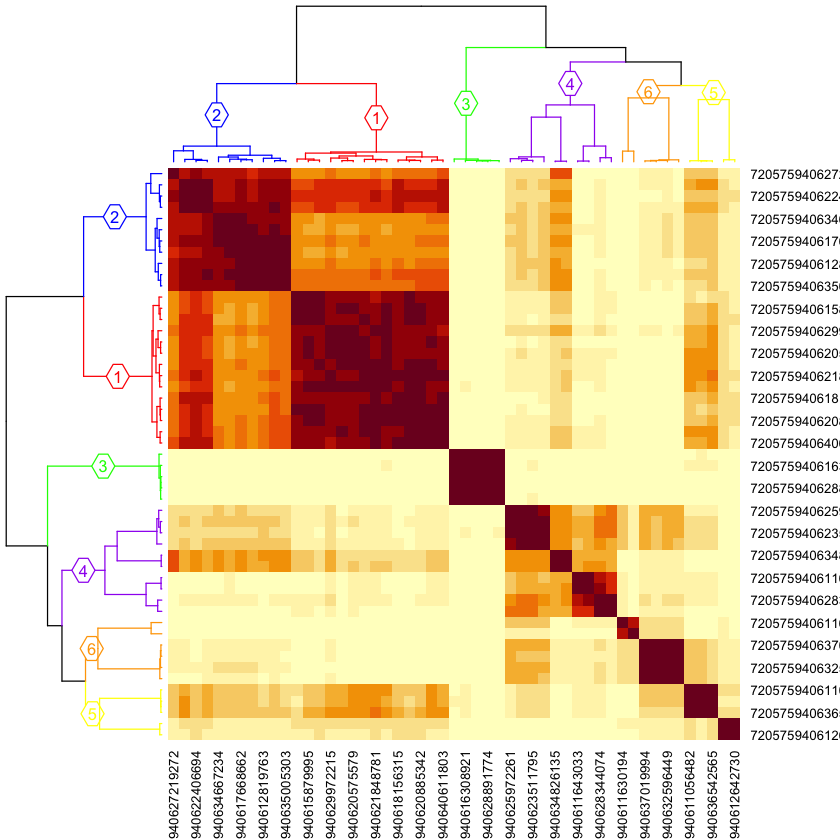

In [94]:
library(tidyverse)
library(coconatfly)
library(glue)
library(dendextend)
library(dendroextras)
library(seriation)

set.seed(42)
options(scipen=999)

#---------------------------------------------------------------------
# Step 1: Obtain the native hclust object from cf_cosine_plot (native ordering)
#---------------------------------------------------------------------
native_hc <- cf_cosine_plot(
    apharyngeal2$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE
)

# Convert to a dendrogram.
native_dend <- as.dendrogram(native_hc)

#---------------------------------------------------------------------
# Step 2: Set the labels on the native dendrogram to your root IDs.
#         Also, force the cosine matrix to use the same labels.
#         (Make sure apharyngeal2_meta$id is in the same order as native_hc's labels.)
#---------------------------------------------------------------------
# Replace the native dendrogram labels with your desired labels:
labels(native_dend) <- apharyngeal2_meta$id

# Extract the cosine similarity matrix:
cosine_matrix <- cf_cosine_plot(
    apharyngeal2$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
matrix = TRUE
)

# Force the rownames and colnames of the cosine matrix to be your root IDs:
rownames(cosine_matrix) <- apharyngeal2_meta$id
colnames(cosine_matrix) <- apharyngeal2_meta$id

#---------------------------------------------------------------------
# Step 3: Decorate the dendrogram with colors and numeric group labels.
#         Here we cut into 6 groups.
#---------------------------------------------------------------------
decorated_dend <- colour_clusters(
    native_dend,
    k = 6,
    col = c("red", "blue", "green", "purple", "yellow", "orange"),
    groupLabels = TRUE
)

# Optionally adjust leaf label font size.
decorated_dend <- set(decorated_dend, "labels_cex", 0.5)

#---------------------------------------------------------------------
# Step 4: Compute the distance (dissimilarity) matrix.
#         Here, dissimilarity = 1 - cosine similarity.
#---------------------------------------------------------------------
diss <- as.dist(1 - cosine_matrix)

# Double-check that the labels match:
if (!identical(sort(labels(decorated_dend)), sort(attr(diss, "Labels")))) {
stop("The labels of the dendrogram and the distance object do not match!")
}

#---------------------------------------------------------------------
# Step 5: Reorder (seriate) the decorated dendrogram using the distance matrix.
#---------------------------------------------------------------------
decorated_dend_ordered <- seriate_dendrogram(decorated_dend, diss, method = "OLO")

#---------------------------------------------------------------------
# Step 6: Plot the heat map using coconatfly's native heat map function,
#         supplying the decorated (and re-ordered) dendrogram via Rowv.
#---------------------------------------------------------------------
pdf(paste0(PATH_output, "aPhN2_heatmap_with_seriated_custom_dendrogram.pdf"),
    width = 15, height = 10)
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,          # Use raw root IDs for row labels in the heatmap
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = decorated_dend_ordered   # Use our re-ordered, decorated dendrogram
))
dev.off()


# Also display in RStudio's plotting window:
par(mar = c(15, 15, 4, 15) + 0.1)
apharyngeal2 %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.8,
        cexCol = 0.8,
        Rowv = decorated_dend_ordered
))
